# Visualisation

## Build the dataframe with the extracted features

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Which features are revelant for the classification ?

### Study the train data set 

In [3]:
df_train = pd.read_csv('df_train.csv')

c:\Users\julie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


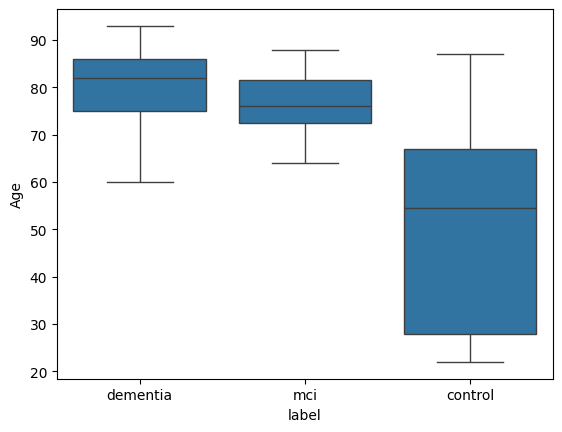

In [4]:
#every feature compared to the label
sns.boxplot(x='label', y='Age', data=df_train)
plt.show()


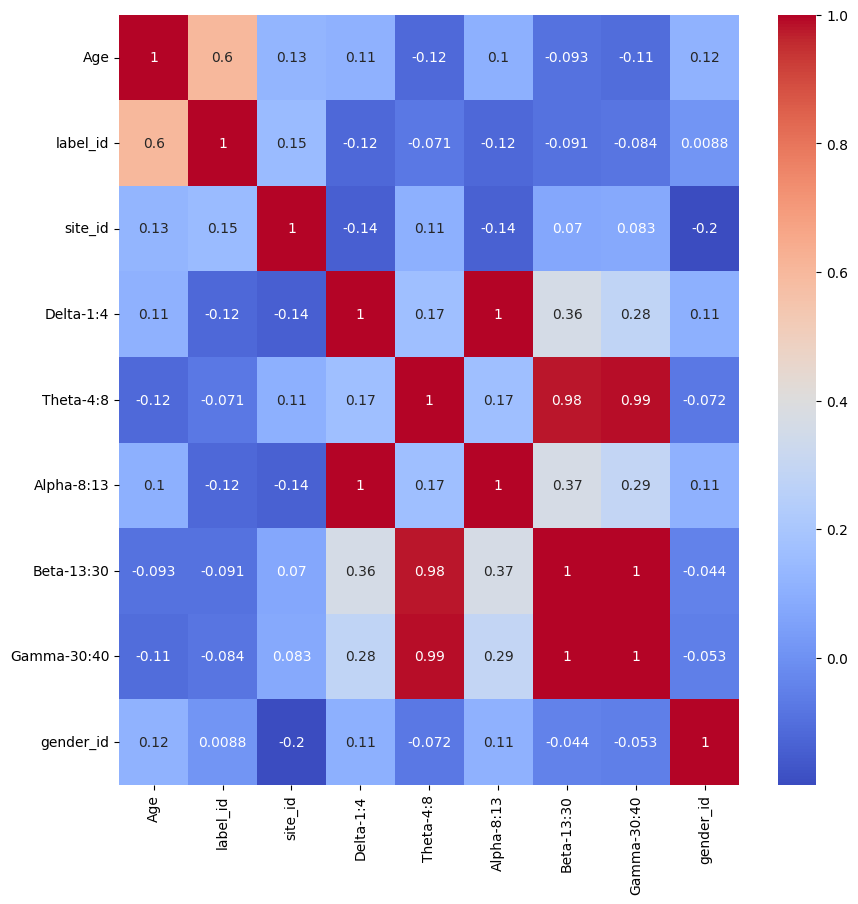

In [5]:
#Heatmap to study the correlation between the features
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [6]:
df_train.corr(numeric_only=True)

,Age,label_id,site_id,Delta-1:4,Theta-4:8,Alpha-8:13,Beta-13:30,Gamma-30:40,gender_id
Age,1.000000,0.602337,0.125091,0.106731,-0.116420,0.102268,-0.092677,-0.107568,0.115864
label_id,0.602337,1.000000,0.146400,-0.118947,-0.071038,-0.118178,-0.091455,-0.084218,0.008838
site_id,0.125091,0.146400,1.000000,-0.141918,0.105601,-0.140644,0.070191,0.082908,-0.197309
Delta-1:4,0.106731,-0.118947,-0.141918,1.000000,0.165101,0.997743,0.362312,0.284222,0.105989
Theta-4:8,-0.116420,-0.071038,0.105601,0.165101,1.000000,0.165186,0.976690,0.988089,-0.071651
Alpha-8:13,0.102268,-0.118178,-0.140644,0.997743,0.165186,1.000000,0.366419,0.290116,0.107511
Beta-13:30,-0.092677,-0.091455,0.070191,0.362312,0.976690,0.366419,1.000000,0.996280,-0.043564
Gamma-30:40,-0.107568,-0.084218,0.082908,0.284222,0.988089,0.290116,0.996280,1.000000,-0.052834
gender_id,0.115864,0.008838,-0.197309,0.105989,-0.071651,0.107511,-0.043564,-0.052834,1.000000


### Clustering

c:\Users\julie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\julie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\julie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\julie\Ap

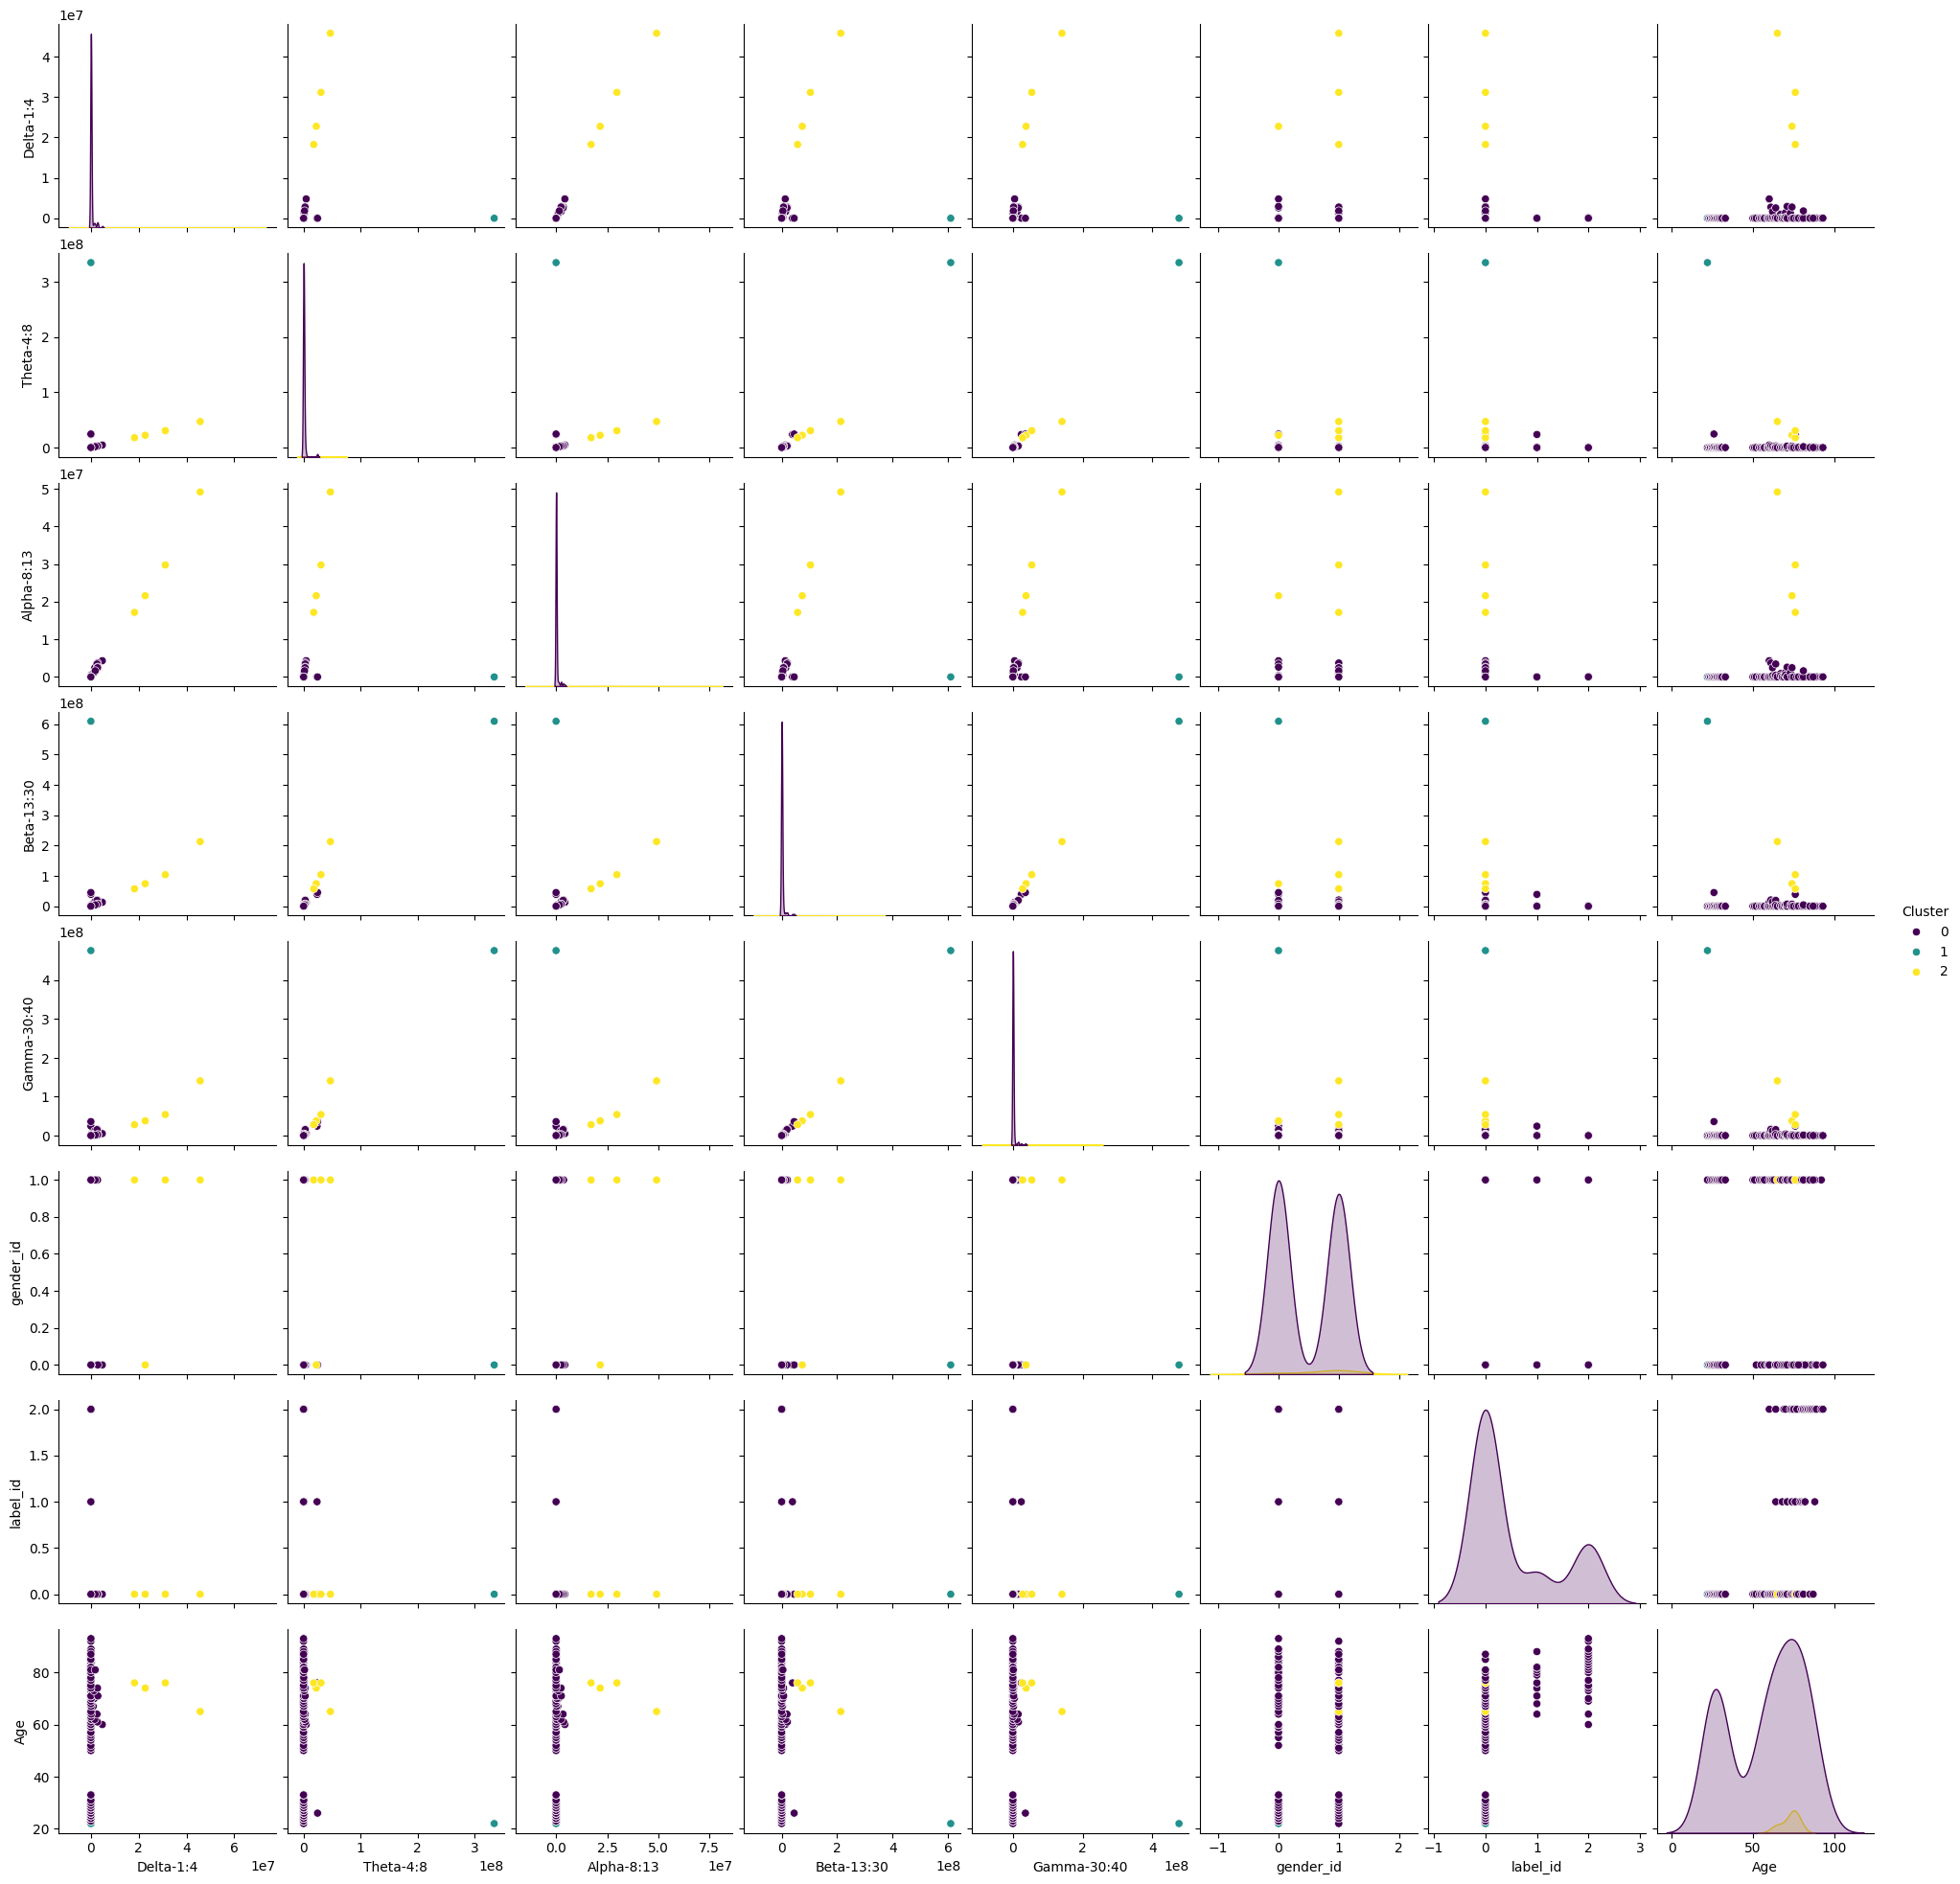

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


# Transformer color values to intergers
color_label_encoder = LabelEncoder()

# matrix of features
X = df_train[["Delta-1:4","Theta-4:8","Alpha-8:13","Beta-13:30","Gamma-30:40", "gender_id", "label_id", "Age"]]

# Clustering between 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df_train['Cluster'] = kmeans.labels_

# visualize clusters
sns.pairplot(df_train, hue="Cluster", vars=["Delta-1:4", "Theta-4:8", "Alpha-8:13",
             "Beta-13:30", "Gamma-30:40", "gender_id", "label_id", "Age"], palette="viridis")

plt.show()

## What to conclude ?

*Age and Label Correlation*: There's a moderate positive correlation between age and label_id (0.602337), suggesting that as age increases, there's a tendency for the label to shift in a way that reflects this variable. This could mean that the condition associated with the label is more prevalent or becomes more severe with age.

*High Correlation between EEG Bands*: The Delta (1-4 Hz), Theta (4-8 Hz), Alpha (8-13 Hz), Beta (13-30 Hz), and Gamma (30-40 Hz) bands show high correlations with each other, especially between Theta and Gamma (0.988089), Beta and Gamma (0.996280), and Beta and Theta (0.976690). This indicates that these EEG frequency bands tend to vary together across the dataset, suggesting that changes in one band are closely associated with changes in the others.

*Low Impact of Gender on Label*: The correlation between gender_id and label_id is very low (0.008838), indicating that gender has almost no direct impact on the label. This suggests that the condition represented by the label affects both genders in a similar way, or that the dataset does not capture any gender-specific differences in how the condition manifests or progresses.